/tmp/ipykernel_1131310/4140372377.py:25: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


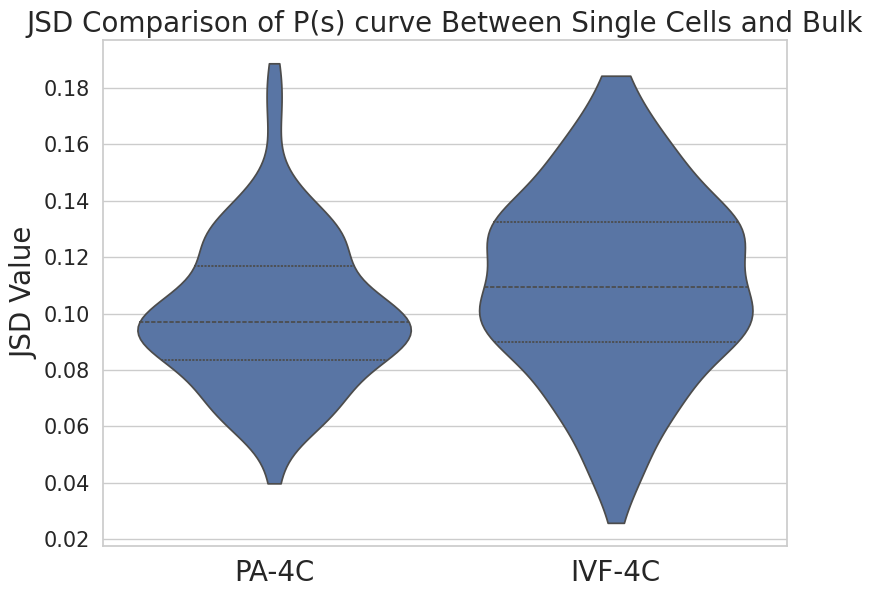

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from scipy import stats
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
data = pd.read_csv('PA_IVF_singlecell2bulk_JSD.txt', sep='\t')

# ---------------------------- 修改点1：筛选数据 ----------------------------
# 只保留 PA-4C 和 IVF-4C 的数据
data_filtered = data[data['cell_type'].isin(['PA-4C', 'IVF-4C'])]
# -------------------------------------------------------------------------

# 调整图形大小
fig, ax = plt.subplots(figsize=(8, 6))

# ---------------------------- 修改点2：绘制筛选后的数据 ----------------------------
# 绘制小提琴图（仅PA-4C和IVF-4C）
sns.violinplot(
    x='cell_type', 
    y='JSD_Value', 
    data=data_filtered, 
    ax=ax, 
    inner="quart", 
    cut=0, 
    scale="width",
    order=['PA-4C', 'IVF-4C']  # 指定顺序
)

# ---------------------------- 修改点3：添加标题 ----------------------------
plt.title('JSD Comparison of P(s) curve Between Single Cells and Bulk', fontsize=20)  # pad调整标题位置
# -------------------------------------------------------------------------

plt.ylabel('JSD Value',fontsize=20)
plt.xlabel('')  # 隐藏x轴标签（类别名已在图中显示）
plt.tight_layout()
# 设置坐标轴刻度字体大小
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)

# 保存为PDF
plt.savefig('PA_IVF_singlecell2bulk_JSD.svg', dpi=300, bbox_inches='tight', transparent=True)